# Introduction

Notebook to analyze the **True Positive** Results for each model in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [14]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [15]:
models_runner_4 = TC_BR_Runner()

lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df()

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [17]:
evals_df_4.head()

model           ref_name  perc_precision  perc_recall  perc_fscore  \
0   lsi  top_10_cosine_0.0           33.08        23.46        26.09   
1   lsi  top_10_cosine_0.1           33.08        23.46        26.09   
2   lsi  top_10_cosine_0.2           33.08        23.46        26.09   
3   lsi  top_10_cosine_0.3           33.08        23.46        26.09   
4   lsi  top_10_cosine_0.4           32.99        23.28        25.97   

                                             eval_df  sim_threshold   top  \
0                  precision    recall    fscore
...            0.0  10.0   
1                  precision    recall    fscore
...            0.1  10.0   
2                  precision    recall    fscore
...            0.2  10.0   
3                  precision    recall    fscore
...            0.3  10.0   
4                  precision    recall    fscore
...            0.4  10.0   

                                      trace_links_df  
0  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
1  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
2  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
3  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
4  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...

### Grouping Results by Model

#### Min Precision

model
bm25          14.04
lda            6.94
lsi            9.07
wordvector     6.21
Name: perc_precision, dtype: float64



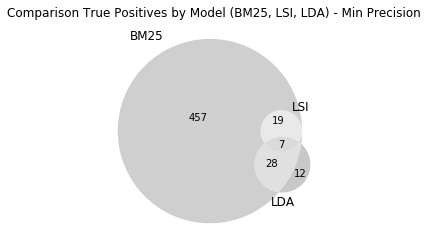

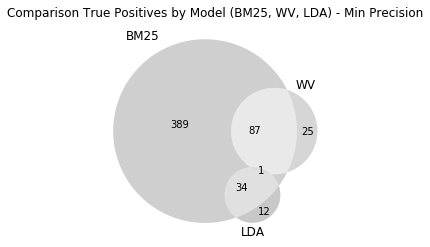

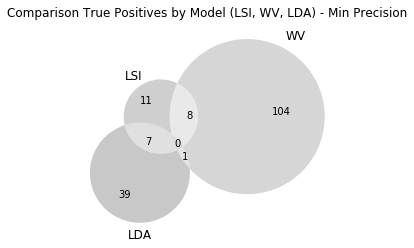

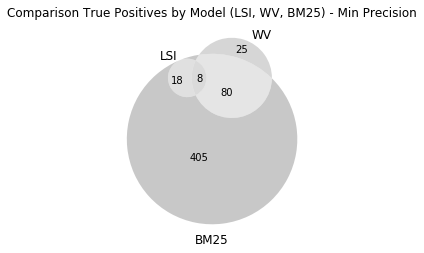

In [32]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [33]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive TP:
len(bm25_exc_set): 378


LSI Exclusive TP:
len(lsi_exc_set): 0


LDA Exclusive TP:


{('TC_15_TRG', 'BR_1357458_SRC'),
 ('TC_19_TRG', 'BR_1297976_SRC'),
 ('TC_19_TRG', 'BR_1353831_SRC'),
 ('TC_20_TRG', 'BR_1297976_SRC'),
 ('TC_20_TRG', 'BR_1353831_SRC'),
 ('TC_20_TRG', 'BR_1357458_SRC'),
 ('TC_21_TRG', 'BR_1353831_SRC'),
 ('TC_21_TRG', 'BR_1357458_SRC'),
 ('TC_22_TRG', 'BR_1297374_SRC'),
 ('TC_22_TRG', 'BR_1352539_SRC'),
 ('TC_23_TRG', 'BR_1297374_SRC'),
 ('TC_24_TRG', 'BR_1353831_SRC')}

len(lda_exc_set): 12


WV Exclusive TP:
len(wv_exc_set): 25


##### True Positives Amount by Model

In [20]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 26
LDA TP Amount: 47
BM25 TP Amount: 511
WV TP Amount: 113


In [21]:
aux_functions.highlight_df(bm25_model_4.get_sim_matrix())

#### Min Recall

model
bm25          14.20
lda            2.59
lsi            1.88
wordvector     3.61
Name: perc_recall, dtype: float64



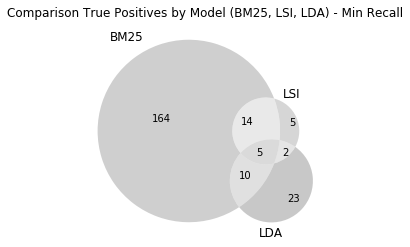

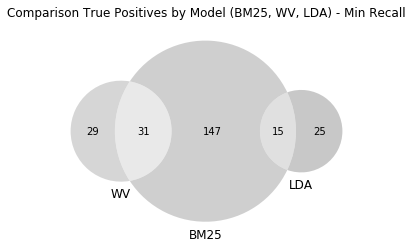

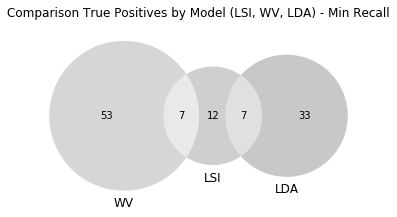

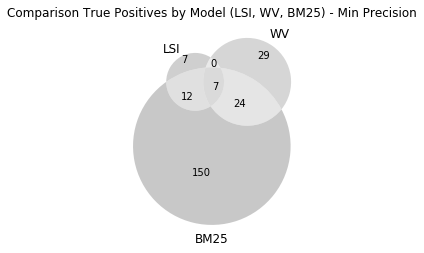

In [22]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'], set_colors=['#888888','#999999','#777777'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [23]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
#display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive TP:
len(bm25_exc_set): 140


LSI Exclusive TP:
len(lsi_exc_set): 5


LDA Exclusive TP:
len(lda_exc_set): 23


WV Exclusive TP:
len(wv_exc_set): 29


##### True Positives Amount by Model

In [24]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 26
LDA TP Amount: 40
BM25 TP Amount: 193
WV TP Amount: 60


#### Max Precision

model
bm25          21.21
lda           20.03
lsi           33.80
wordvector     6.85
Name: perc_precision, dtype: float64



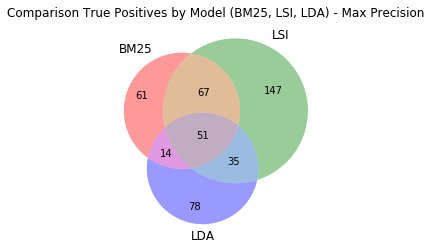

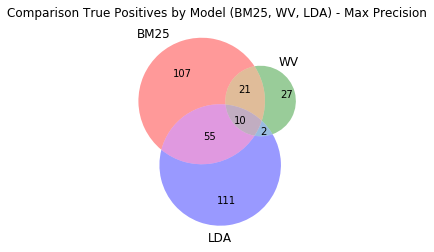

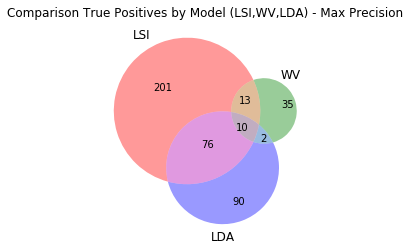

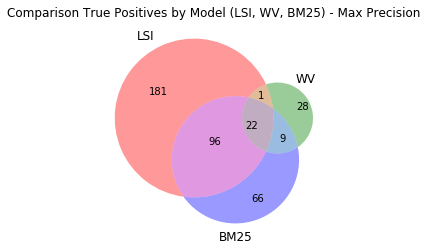

In [25]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [26]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
#display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive TP:
len(bm25_exc_set): 52


LSI Exclusive TP:
len(lsi_exc_set): 146


LDA Exclusive TP:
len(lda_exc_set): 76


WV Exclusive TP:
len(wv_exc_set): 26


##### True Positives Amount by Model

In [27]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 300
LDA TP Amount: 178
BM25 TP Amount: 193
WV TP Amount: 60


#### Max Recall

model
bm25          32.54
lda           33.25
lsi           46.99
wordvector    12.62
Name: perc_recall, dtype: float64



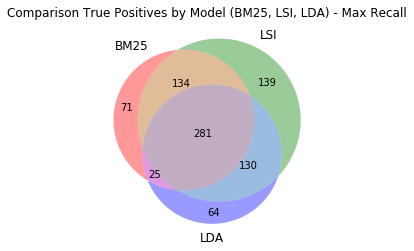

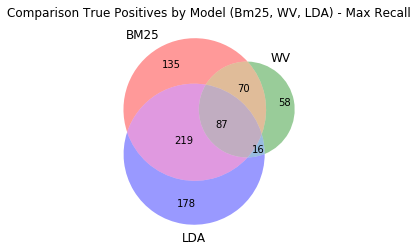

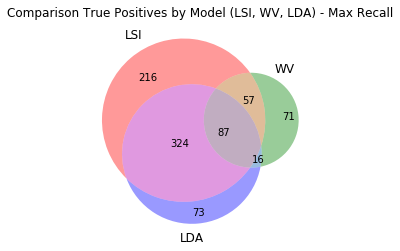

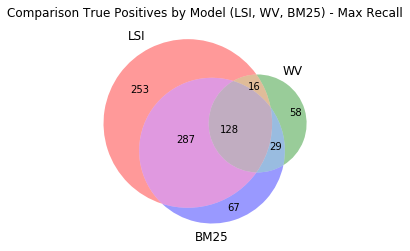

In [28]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [29]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
#display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive TP:
len(bm25_exc_set): 48


LSI Exclusive TP:
len(lsi_exc_set): 129


LDA Exclusive TP:
len(lda_exc_set): 54


WV Exclusive TP:
len(wv_exc_set): 48


##### True Positives Amount by Model

In [30]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 684
LDA TP Amount: 500
BM25 TP Amount: 511
WV TP Amount: 231
